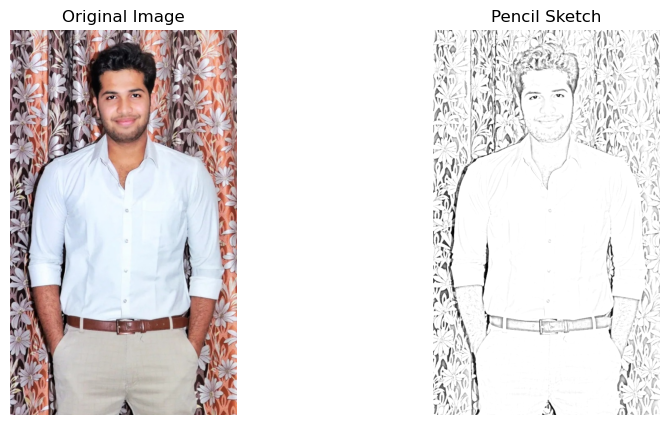

In [7]:
import cv2
import matplotlib.pyplot as plt

def convert_to_pencil_sketch(image_path):
    # Read the image in RGB format
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image (negative image)
    inverted_gray_image = 255 - gray_image

    # Apply GaussianBlur to the inverted grayscale image
    blurred_image = cv2.GaussianBlur(inverted_gray_image, (21, 21), sigmaX=0, sigmaY=0)

    # Invert the blurred image again
    inverted_blurred_image = 255 - blurred_image

    # Create the pencil sketch by dividing the grayscale image by the inverted blurred image
    pencil_sketch = cv2.divide(gray_image, inverted_blurred_image, scale=256.0)

    return pencil_sketch

if __name__ == "__main__":
    # Replace 'input_image.jpg' with the path to your input image
    input_image_path = '/kaggle/input/imgtosketch/profile-img.jpg'
    
    # Convert the image to pencil sketch
    pencil_sketch = convert_to_pencil_sketch(input_image_path)

    # Save the original image and the pencil sketch as files
    cv2.imwrite('original_image.jpg', cv2.imread(input_image_path))
    cv2.imwrite('pencil_sketch.jpg', pencil_sketch)

    # Display the original image and the pencil sketch using matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    original_image = cv2.cvtColor(cv2.imread('original_image.jpg'), cv2.COLOR_BGR2RGB)
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(pencil_sketch, cmap='gray')
    axes[1].set_title("Pencil Sketch")
    axes[1].axis('off')

    plt.show()
